In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden


(1, 256)
(1, 100)
(256, 100)


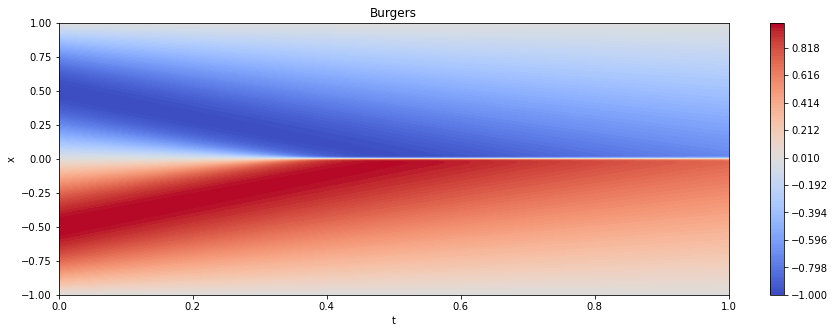

In [3]:
# Load the .mat file
mat_data = scipy.io.loadmat('burg.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u1']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [4]:
# Toy problem data
input_size = 256
hidden_size = 32
output_size = 256
sequence_length = 79
batch_size = 1
num_epochs = 20000


# Set random seed for reproducibility
torch.manual_seed(42)



input_data = u[:,0:79]
target_data = u[:,1:80]

test_data = u[:,79]
test_target = u[:,80:100]


# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()


In [5]:
# Create RNN instance
rnn = RNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = rnn(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.8f}')


Epoch: 10/20000, Loss: 0.06343269
Epoch: 20/20000, Loss: 0.02951436
Epoch: 30/20000, Loss: 0.01273151
Epoch: 40/20000, Loss: 0.00627388
Epoch: 50/20000, Loss: 0.00415451
Epoch: 60/20000, Loss: 0.00346552
Epoch: 70/20000, Loss: 0.00286995
Epoch: 80/20000, Loss: 0.00246104
Epoch: 90/20000, Loss: 0.00208485
Epoch: 100/20000, Loss: 0.00204409
Epoch: 110/20000, Loss: 0.00260543
Epoch: 120/20000, Loss: 0.00165098
Epoch: 130/20000, Loss: 0.00112975
Epoch: 140/20000, Loss: 0.00090413
Epoch: 150/20000, Loss: 0.00077039
Epoch: 160/20000, Loss: 0.00067978
Epoch: 170/20000, Loss: 0.00061706
Epoch: 180/20000, Loss: 0.00057764
Epoch: 190/20000, Loss: 0.00054677
Epoch: 200/20000, Loss: 0.00052179
Epoch: 210/20000, Loss: 0.00050334
Epoch: 220/20000, Loss: 0.00197762
Epoch: 230/20000, Loss: 0.00088937
Epoch: 240/20000, Loss: 0.00064884
Epoch: 250/20000, Loss: 0.00046666
Epoch: 260/20000, Loss: 0.00041440
Epoch: 270/20000, Loss: 0.00038720
Epoch: 280/20000, Loss: 0.00035431
Epoch: 290/20000, Loss: 0.000

Epoch: 2370/20000, Loss: 0.00003115
Epoch: 2380/20000, Loss: 0.00009042
Epoch: 2390/20000, Loss: 0.00005809
Epoch: 2400/20000, Loss: 0.00003297
Epoch: 2410/20000, Loss: 0.00001092
Epoch: 2420/20000, Loss: 0.00001567
Epoch: 2430/20000, Loss: 0.00001473
Epoch: 2440/20000, Loss: 0.00002588
Epoch: 2450/20000, Loss: 0.00018063
Epoch: 2460/20000, Loss: 0.00012451
Epoch: 2470/20000, Loss: 0.00005258
Epoch: 2480/20000, Loss: 0.00001964
Epoch: 2490/20000, Loss: 0.00001335
Epoch: 2500/20000, Loss: 0.00001348
Epoch: 2510/20000, Loss: 0.00001129
Epoch: 2520/20000, Loss: 0.00001193
Epoch: 2530/20000, Loss: 0.00004733
Epoch: 2540/20000, Loss: 0.00027635
Epoch: 2550/20000, Loss: 0.00027121
Epoch: 2560/20000, Loss: 0.00012574
Epoch: 2570/20000, Loss: 0.00004208
Epoch: 2580/20000, Loss: 0.00002303
Epoch: 2590/20000, Loss: 0.00001333
Epoch: 2600/20000, Loss: 0.00001112
Epoch: 2610/20000, Loss: 0.00001204
Epoch: 2620/20000, Loss: 0.00003998
Epoch: 2630/20000, Loss: 0.00030627
Epoch: 2640/20000, Loss: 0.0

Epoch: 4700/20000, Loss: 0.00056080
Epoch: 4710/20000, Loss: 0.00019381
Epoch: 4720/20000, Loss: 0.00006862
Epoch: 4730/20000, Loss: 0.00002776
Epoch: 4740/20000, Loss: 0.00000807
Epoch: 4750/20000, Loss: 0.00000388
Epoch: 4760/20000, Loss: 0.00000429
Epoch: 4770/20000, Loss: 0.00000322
Epoch: 4780/20000, Loss: 0.00000389
Epoch: 4790/20000, Loss: 0.00002637
Epoch: 4800/20000, Loss: 0.00017262
Epoch: 4810/20000, Loss: 0.00038777
Epoch: 4820/20000, Loss: 0.00010474
Epoch: 4830/20000, Loss: 0.00005878
Epoch: 4840/20000, Loss: 0.00003035
Epoch: 4850/20000, Loss: 0.00001594
Epoch: 4860/20000, Loss: 0.00000553
Epoch: 4870/20000, Loss: 0.00000433
Epoch: 4880/20000, Loss: 0.00001080
Epoch: 4890/20000, Loss: 0.00013431
Epoch: 4900/20000, Loss: 0.00022404
Epoch: 4910/20000, Loss: 0.00010526
Epoch: 4920/20000, Loss: 0.00002612
Epoch: 4930/20000, Loss: 0.00002120
Epoch: 4940/20000, Loss: 0.00001226
Epoch: 4950/20000, Loss: 0.00001328
Epoch: 4960/20000, Loss: 0.00006151
Epoch: 4970/20000, Loss: 0.0

Epoch: 7000/20000, Loss: 0.00005286
Epoch: 7010/20000, Loss: 0.00002474
Epoch: 7020/20000, Loss: 0.00018299
Epoch: 7030/20000, Loss: 0.00002367
Epoch: 7040/20000, Loss: 0.00007395
Epoch: 7050/20000, Loss: 0.00015323
Epoch: 7060/20000, Loss: 0.00000762
Epoch: 7070/20000, Loss: 0.00001778
Epoch: 7080/20000, Loss: 0.00001123
Epoch: 7090/20000, Loss: 0.00002011
Epoch: 7100/20000, Loss: 0.00006656
Epoch: 7110/20000, Loss: 0.00009330
Epoch: 7120/20000, Loss: 0.00031972
Epoch: 7130/20000, Loss: 0.00013373
Epoch: 7140/20000, Loss: 0.00016712
Epoch: 7150/20000, Loss: 0.00005037
Epoch: 7160/20000, Loss: 0.00003232
Epoch: 7170/20000, Loss: 0.00001019
Epoch: 7180/20000, Loss: 0.00000586
Epoch: 7190/20000, Loss: 0.00000370
Epoch: 7200/20000, Loss: 0.00000929
Epoch: 7210/20000, Loss: 0.00012539
Epoch: 7220/20000, Loss: 0.00021233
Epoch: 7230/20000, Loss: 0.00020698
Epoch: 7240/20000, Loss: 0.00011316
Epoch: 7250/20000, Loss: 0.00007523
Epoch: 7260/20000, Loss: 0.00002240
Epoch: 7270/20000, Loss: 0.0

Epoch: 9350/20000, Loss: 0.00000583
Epoch: 9360/20000, Loss: 0.00004705
Epoch: 9370/20000, Loss: 0.00041944
Epoch: 9380/20000, Loss: 0.00012258
Epoch: 9390/20000, Loss: 0.00017455
Epoch: 9400/20000, Loss: 0.00004287
Epoch: 9410/20000, Loss: 0.00001769
Epoch: 9420/20000, Loss: 0.00000587
Epoch: 9430/20000, Loss: 0.00000425
Epoch: 9440/20000, Loss: 0.00001222
Epoch: 9450/20000, Loss: 0.00022224
Epoch: 9460/20000, Loss: 0.00008426
Epoch: 9470/20000, Loss: 0.00004197
Epoch: 9480/20000, Loss: 0.00002012
Epoch: 9490/20000, Loss: 0.00001280
Epoch: 9500/20000, Loss: 0.00000642
Epoch: 9510/20000, Loss: 0.00000423
Epoch: 9520/20000, Loss: 0.00001208
Epoch: 9530/20000, Loss: 0.00014688
Epoch: 9540/20000, Loss: 0.00003187
Epoch: 9550/20000, Loss: 0.00007578
Epoch: 9560/20000, Loss: 0.00013645
Epoch: 9570/20000, Loss: 0.00001050
Epoch: 9580/20000, Loss: 0.00002099
Epoch: 9590/20000, Loss: 0.00000168
Epoch: 9600/20000, Loss: 0.00000697
Epoch: 9610/20000, Loss: 0.00004448
Epoch: 9620/20000, Loss: 0.0

Epoch: 11650/20000, Loss: 0.00000183
Epoch: 11660/20000, Loss: 0.00000170
Epoch: 11670/20000, Loss: 0.00000248
Epoch: 11680/20000, Loss: 0.00002295
Epoch: 11690/20000, Loss: 0.00025366
Epoch: 11700/20000, Loss: 0.00002105
Epoch: 11710/20000, Loss: 0.00000408
Epoch: 11720/20000, Loss: 0.00000900
Epoch: 11730/20000, Loss: 0.00000768
Epoch: 11740/20000, Loss: 0.00000156
Epoch: 11750/20000, Loss: 0.00000168
Epoch: 11760/20000, Loss: 0.00000635
Epoch: 11770/20000, Loss: 0.00010263
Epoch: 11780/20000, Loss: 0.00033582
Epoch: 11790/20000, Loss: 0.00020970
Epoch: 11800/20000, Loss: 0.00004871
Epoch: 11810/20000, Loss: 0.00003346
Epoch: 11820/20000, Loss: 0.00001759
Epoch: 11830/20000, Loss: 0.00000634
Epoch: 11840/20000, Loss: 0.00000244
Epoch: 11850/20000, Loss: 0.00000168
Epoch: 11860/20000, Loss: 0.00000168
Epoch: 11870/20000, Loss: 0.00000205
Epoch: 11880/20000, Loss: 0.00001508
Epoch: 11890/20000, Loss: 0.00024696
Epoch: 11900/20000, Loss: 0.00008445
Epoch: 11910/20000, Loss: 0.00050233
E

Epoch: 13890/20000, Loss: 0.00000287
Epoch: 13900/20000, Loss: 0.00000796
Epoch: 13910/20000, Loss: 0.00008822
Epoch: 13920/20000, Loss: 0.00002181
Epoch: 13930/20000, Loss: 0.00010332
Epoch: 13940/20000, Loss: 0.00020586
Epoch: 13950/20000, Loss: 0.00002324
Epoch: 13960/20000, Loss: 0.00000653
Epoch: 13970/20000, Loss: 0.00000291
Epoch: 13980/20000, Loss: 0.00000226
Epoch: 13990/20000, Loss: 0.00000342
Epoch: 14000/20000, Loss: 0.00003003
Epoch: 14010/20000, Loss: 0.00070633
Epoch: 14020/20000, Loss: 0.00019671
Epoch: 14030/20000, Loss: 0.00005450
Epoch: 14040/20000, Loss: 0.00011254
Epoch: 14050/20000, Loss: 0.00003878
Epoch: 14060/20000, Loss: 0.00001619
Epoch: 14070/20000, Loss: 0.00000864
Epoch: 14080/20000, Loss: 0.00000413
Epoch: 14090/20000, Loss: 0.00000257
Epoch: 14100/20000, Loss: 0.00000278
Epoch: 14110/20000, Loss: 0.00000276
Epoch: 14120/20000, Loss: 0.00001885
Epoch: 14130/20000, Loss: 0.00031587
Epoch: 14140/20000, Loss: 0.00043138
Epoch: 14150/20000, Loss: 0.00005600
E

Epoch: 16170/20000, Loss: 0.00009196
Epoch: 16180/20000, Loss: 0.00003491
Epoch: 16190/20000, Loss: 0.00001925
Epoch: 16200/20000, Loss: 0.00002159
Epoch: 16210/20000, Loss: 0.00005145
Epoch: 16220/20000, Loss: 0.00002343
Epoch: 16230/20000, Loss: 0.00000514
Epoch: 16240/20000, Loss: 0.00001314
Epoch: 16250/20000, Loss: 0.00004070
Epoch: 16260/20000, Loss: 0.00032666
Epoch: 16270/20000, Loss: 0.00001186
Epoch: 16280/20000, Loss: 0.00002622
Epoch: 16290/20000, Loss: 0.00014922
Epoch: 16300/20000, Loss: 0.00005319
Epoch: 16310/20000, Loss: 0.00001230
Epoch: 16320/20000, Loss: 0.00000689
Epoch: 16330/20000, Loss: 0.00000828
Epoch: 16340/20000, Loss: 0.00000474
Epoch: 16350/20000, Loss: 0.00004107
Epoch: 16360/20000, Loss: 0.00074031
Epoch: 16370/20000, Loss: 0.00027352
Epoch: 16380/20000, Loss: 0.00008615
Epoch: 16390/20000, Loss: 0.00001486
Epoch: 16400/20000, Loss: 0.00002694
Epoch: 16410/20000, Loss: 0.00009816
Epoch: 16420/20000, Loss: 0.00003547
Epoch: 16430/20000, Loss: 0.00000707
E

Epoch: 18420/20000, Loss: 0.00002012
Epoch: 18430/20000, Loss: 0.00000618
Epoch: 18440/20000, Loss: 0.00000392
Epoch: 18450/20000, Loss: 0.00000302
Epoch: 18460/20000, Loss: 0.00005721
Epoch: 18470/20000, Loss: 0.00080466
Epoch: 18480/20000, Loss: 0.00003270
Epoch: 18490/20000, Loss: 0.00008032
Epoch: 18500/20000, Loss: 0.00002646
Epoch: 18510/20000, Loss: 0.00001027
Epoch: 18520/20000, Loss: 0.00000539
Epoch: 18530/20000, Loss: 0.00000548
Epoch: 18540/20000, Loss: 0.00000505
Epoch: 18550/20000, Loss: 0.00000609
Epoch: 18560/20000, Loss: 0.00006897
Epoch: 18570/20000, Loss: 0.00005966
Epoch: 18580/20000, Loss: 0.00003741
Epoch: 18590/20000, Loss: 0.00001742
Epoch: 18600/20000, Loss: 0.00001322
Epoch: 18610/20000, Loss: 0.00000338
Epoch: 18620/20000, Loss: 0.00000840
Epoch: 18630/20000, Loss: 0.00002530
Epoch: 18640/20000, Loss: 0.00061903
Epoch: 18650/20000, Loss: 0.00024655
Epoch: 18660/20000, Loss: 0.00010644
Epoch: 18670/20000, Loss: 0.00001687
Epoch: 18680/20000, Loss: 0.00000326
E

In [6]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 20, 256])


In [7]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = rnn(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = rnn(prediction, hidden_pred)
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction

### Four different types of error

In [8]:
# Exact Solution
u_1 = u
u_test = u_1.T
u_test_full = u_test[80:100, :]

In [9]:
prediction_tensor = torch.squeeze(prediction_tensor)

In [10]:
# Extrapolation

k1 = ( prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
u_test_full_tensor.shape

torch.Size([20, 256])

### L^2 norm error

In [11]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.41547940429673846 %


### Max absolute norm error

In [12]:
R_abs = torch.max(torch.abs(prediction_tensor - u_test_full))

In [13]:
print(R_abs)

tensor(0.5943, dtype=torch.float64)


### Explained variance score

In [14]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
# a = torch.tensor(a)
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())

Explained Variance Score: 0.5845210208897824


### Mean absolute error

In [15]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(torch.abs(prediction_tensor - u_test_full))

print("Relative Error Test: ", relative_error_test, "%")

Relative Error Test:  tensor(0.2662, dtype=torch.float64) %


### Contour plot for PINN (80 percent) and (20 percentage lem prediction)

In [16]:
print(prediction_tensor.shape)
prediction_tensor = torch.squeeze(prediction_tensor)
input_tensor = torch.squeeze(input_tensor)

conc_u = torch.squeeze(input_tensor)
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)

x1 = np.linspace(-1, 1, 256)
t1 = np.linspace(0, 1, 99)

torch.Size([20, 256])


### Snapshot time plots

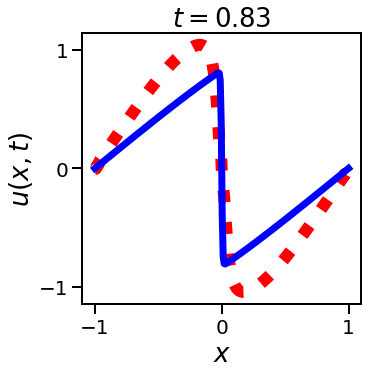

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed




final_time_output = prediction_tensor[3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_1[:, 83].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.83}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('RNN_0.83_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.83_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()

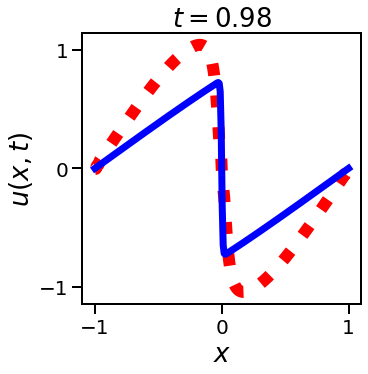

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_1[:, -2].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.98}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('RNN_0.98_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


### Contour plot where 80 percent for PINN solution and 20 percent for RNN solution

### Exact contour

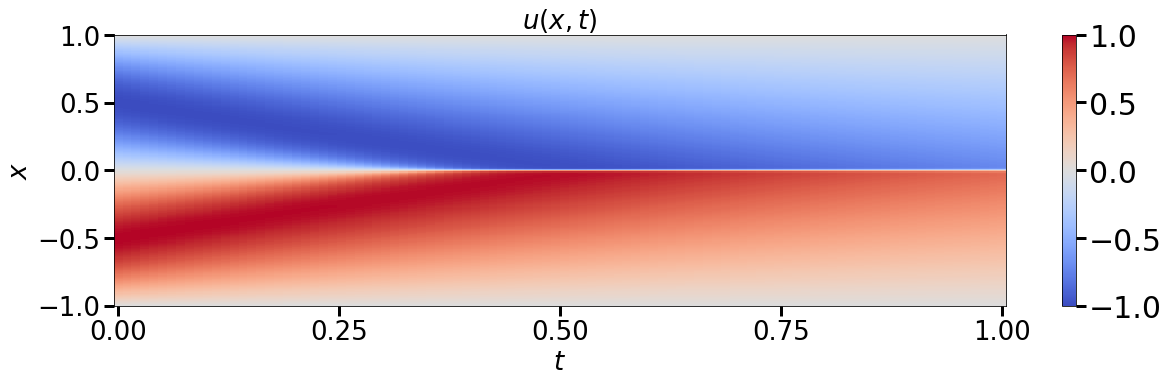

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = u_1.T

# Define custom color levels
x = np.linspace(-1, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='coolwarm')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

#plt.savefig('Contour_Exact.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_exact.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


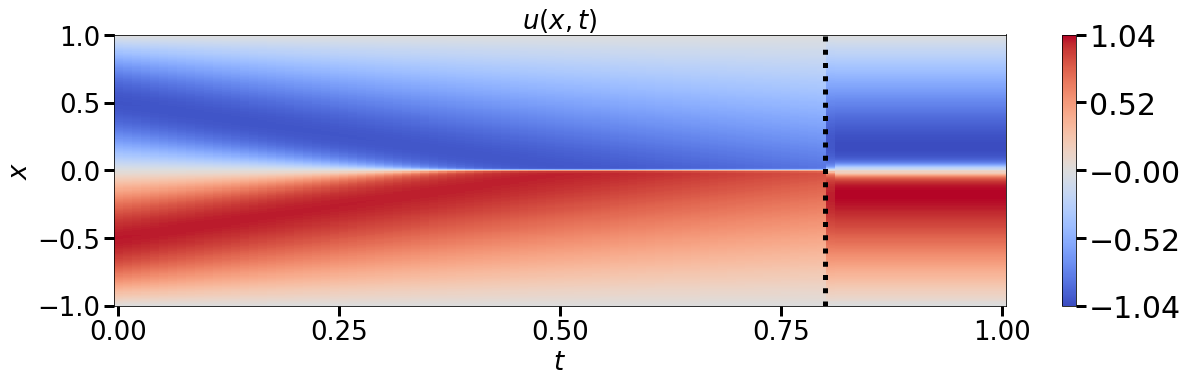

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(-1, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='coolwarm')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_RNN_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
